In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import awkward as ak
import uproot 
import mplhep as hep
import hist
import os
from matplotlib.colors import LogNorm


from UtilityAndConst import *
from Functions import *

dir = "/Users/francescolarovere/Documents/Tesi-Triennale/Dati"
os.chdir(dir)

hep.style.use("CMS")
np.set_printoptions(threshold=np.inf)

In [3]:
Lumi = 2e-34
LumiSec = 23
BarnTocm = 1e24
nano = 1e-9

IntLumi = (4* Lumi * LumiSec)*BarnTocm

print(IntLumi/nano)

18.4


In [4]:
#import Files

LS133 = "./ntupleStubsBmtfGmt_LS133.root"
LS263 = "./ntupleStubsBmtfGmt_LS263.root"
LS264 = "./ntupleStubsBmtfGmt_LS264.root"
LS306 = "./ntupleStubsBmtfGmt_LS306.root"

#Open file
stubs_awk_LS133 = OpenRootFile(LS133, stub_features)
stubs_awk_LS263 = OpenRootFile(LS263, stub_features)
stubs_awk_LS264 = OpenRootFile(LS264, stub_features)
stubs_awk_LS306 = OpenRootFile(LS306, stub_features)

#Caricamenot BX
BX_LS133 = stubs_awk_LS133.bx
BX_LS263 = stubs_awk_LS263.bx
BX_LS264 = stubs_awk_LS264.bx
BX_LS306 = stubs_awk_LS306.bx

#Caricamento Stubs 
nStubsLS133 = stubs_awk_LS133.nStubs
nStubsLS263 = stubs_awk_LS263.nStubs
nStubsLS264 = stubs_awk_LS264.nStubs
nStubsLS306 = stubs_awk_LS306.nStubs

# Filling Scheme 

Prima viene fatta una analisi con tutti e quattro i set di dati separati; notato che non vi è nessuna correlazione evidente si passa a studiare l'istogramma con tutti i dati disponibili

In [5]:
bx_range = np.arange(ONE_ORBIT_IN_BX + 2)

bx_stub_counts_LS133 = np.bincount(BX_LS133, weights=nStubsLS133)
bx_stub_counts_LS263 = np.bincount(BX_LS263, weights=nStubsLS263)
bx_stub_counts_LS264 = np.bincount(BX_LS264, weights=nStubsLS264)
bx_stub_counts_LS306 = np.bincount(BX_LS306, weights=nStubsLS306)

bx_stub_counts = ak.Array([bx_stub_counts_LS133, bx_stub_counts_LS263, bx_stub_counts_LS264, bx_stub_counts_LS306])

### Con tutti e quattro i file assime:

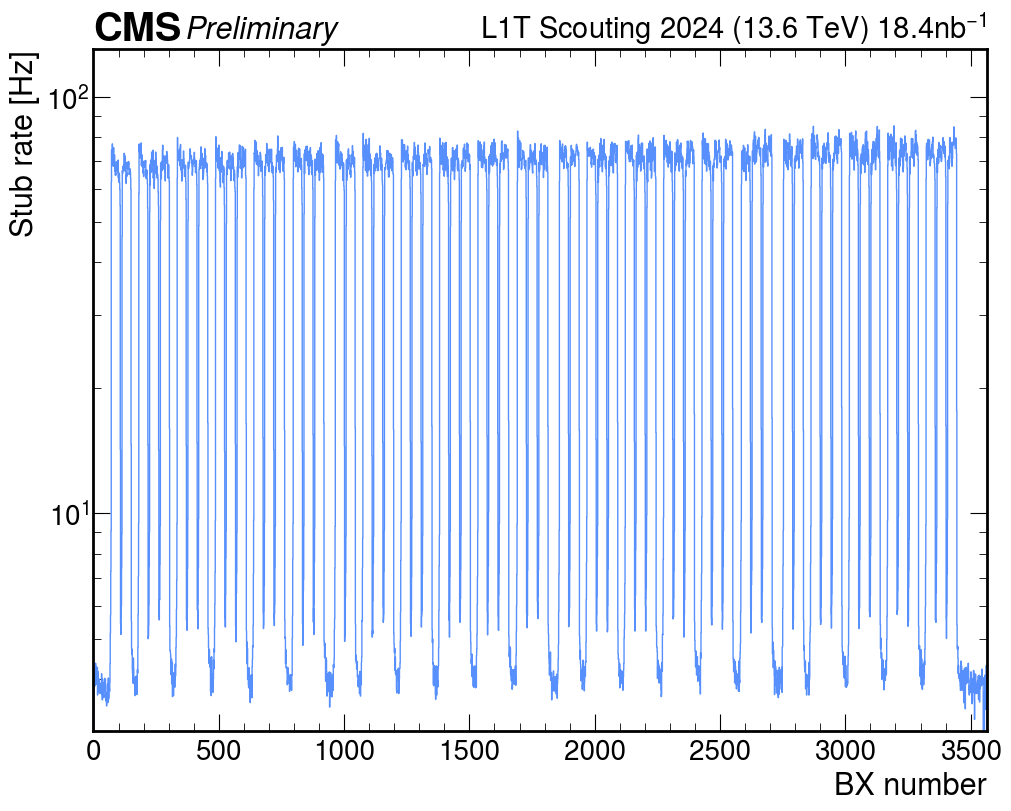

In [6]:
#Mettendo tutti i 4 set di dati indipendenti assieme:

text1 = (r"$\tau$ sonde: %.0f $\pm$ %.0f $\mu$s" %(509, 2)) 


bx_stub_counts_tot = (bx_stub_counts_LS133 + bx_stub_counts_LS263 + bx_stub_counts_LS264 + bx_stub_counts_LS306)/4

fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE)

ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_stub_counts_tot), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(0, ONE_ORBIT_IN_BX)
ax.set_ylim(3, 130)

ax.set_yscale('log')

plt.savefig("../Immagini/StubsBXnumber.pdf")

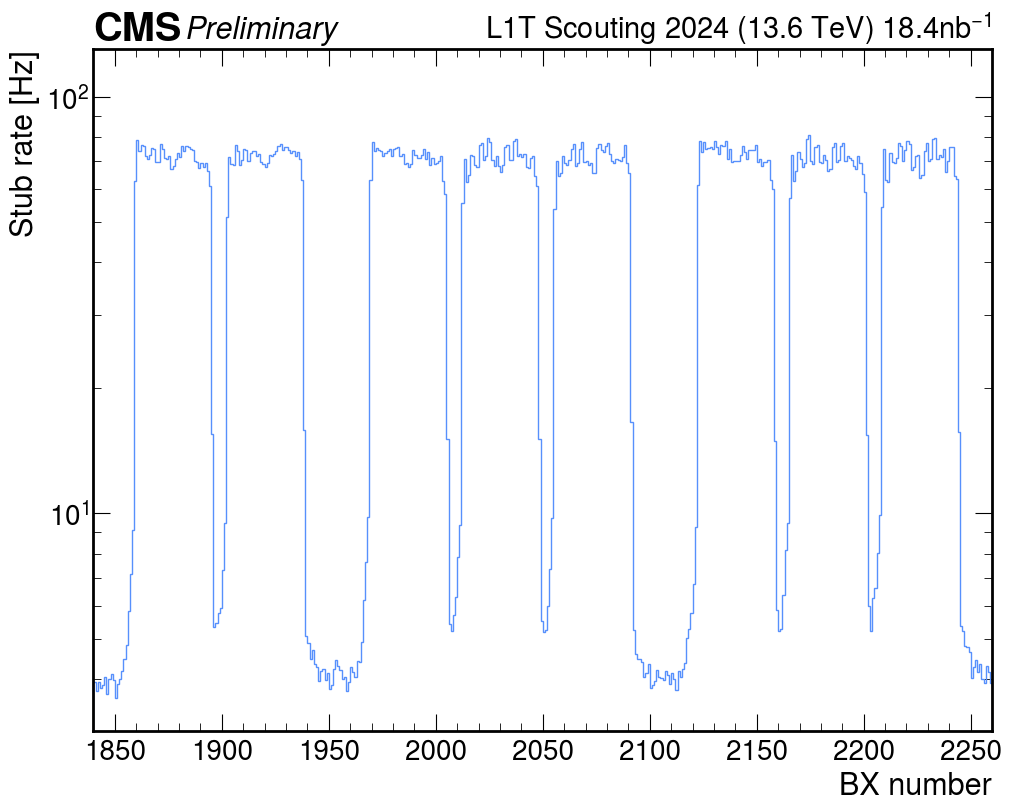

In [7]:
#Zoom in una regione con tutti i dati:

fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE)

bx_left = 1840
bx_right = 2260

ax.hist(bx_range[bx_left:bx_right], bins=bx_range[bx_left:bx_right+1], weights=ConvertToHz(bx_stub_counts_tot[bx_left:bx_right]), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(bx_left, bx_right)
ax.set_ylim(3, 130)
ax.set_yscale('log')

plt.savefig("../Immagini/StubsBXnumberZoom.pdf")

# Grafici Bidimensionali

In [8]:
#------------------------------------------LS133------------------------------------------#
StationLS133  = ak.flatten(stubs_awk_LS133.stubStation )
SectorLS133   = ak.flatten(stubs_awk_LS133.stubSector)
WheelLS133    = ak.flatten(stubs_awk_LS133.stubWheel )

#------------------------------------------LS263------------------------------------------#
StationLS263  = ak.flatten(stubs_awk_LS263.stubStation )
SectorLS263   = ak.flatten(stubs_awk_LS263.stubSector)
WheelLS263    = ak.flatten(stubs_awk_LS263.stubWheel )

#------------------------------------------LS264------------------------------------------#
StationLS264  = ak.flatten(stubs_awk_LS264.stubStation )
SectorLS264   = ak.flatten(stubs_awk_LS264.stubSector)
WheelLS264    = ak.flatten(stubs_awk_LS264.stubWheel)

#------------------------------------------LS306------------------------------------------#
StationLS306  = ak.flatten(stubs_awk_LS306.stubStation)
SectorLS306   = ak.flatten(stubs_awk_LS306.stubSector)
WheelLS306    = ak.flatten(stubs_awk_LS306.stubWheel)

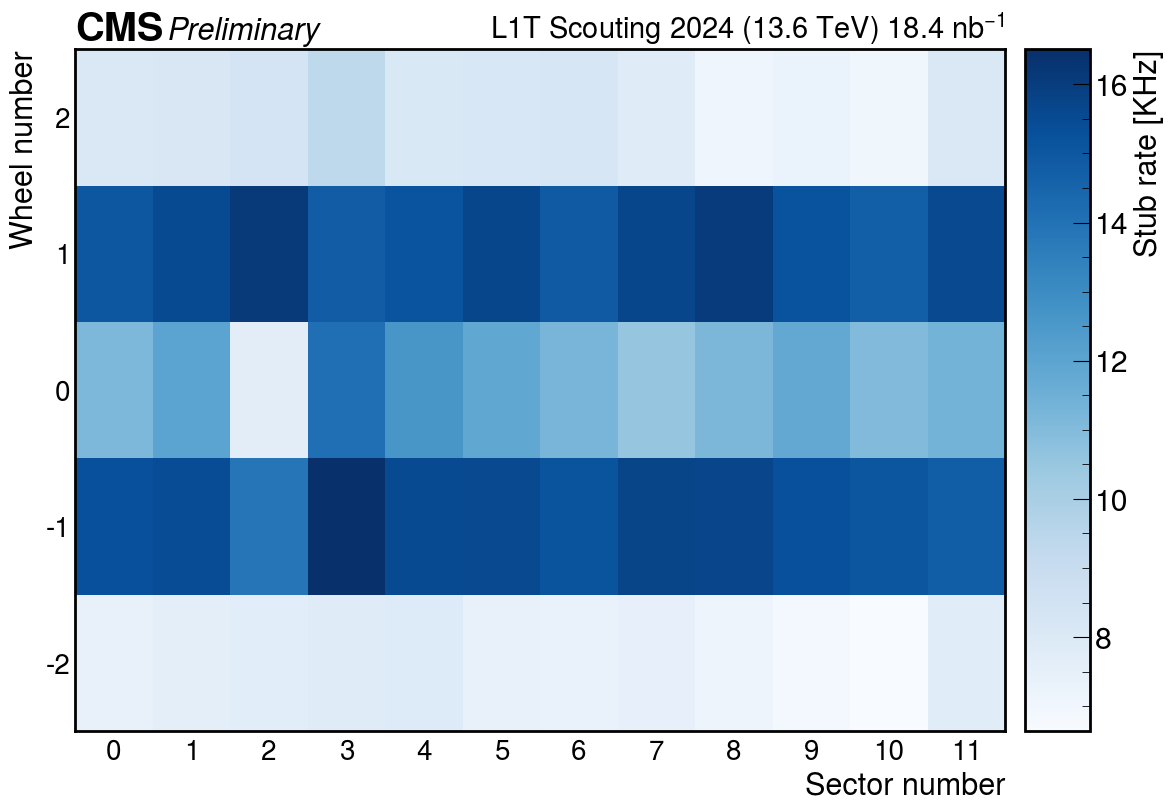

In [9]:
stub_sectors = ak.concatenate([SectorLS133, SectorLS263, SectorLS264, SectorLS306])
stub_wheels  = ak.concatenate([WheelLS133, WheelLS263, WheelLS264, WheelLS306])

sector_bins = np.arange(13)
wheel_bins  = np.arange(-2, 4)

hist2d = hist.Hist(
    hist.axis.Variable(sector_bins, name='sector', label='Sector number'),
    hist.axis.Variable(wheel_bins, name='wheel', label='Wheel number'),
)
hist2d.fill(sector=stub_sectors, wheel=stub_wheels)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize=FONTSIZE, rlabel="L1T Scouting 2024 (13.6 TeV) 18.4 $nb^{-1}$")

hep.hist2dplot(ConvertToKHz(hist2d), cbar=True, cmap='Blues', ax=ax)

cbar = ax.collections[0].colorbar
cbar.set_label('Stub rate [KHz]', fontsize=FONTSIZE)

ax.set_xlabel('Sector number', fontsize = FONTSIZE)
ax.set_ylabel('Wheel number', fontsize = FONTSIZE)

ax.set_xticks(np.arange(12)+0.5)
ax.set_xticklabels(np.arange(12))

ax.set_yticks(np.arange(-2, 3)+0.5)
ax.set_yticklabels(np.arange(-2, 3))

plt.savefig("../Immagini/StubsSectorWheel.pdf")

plt.show()

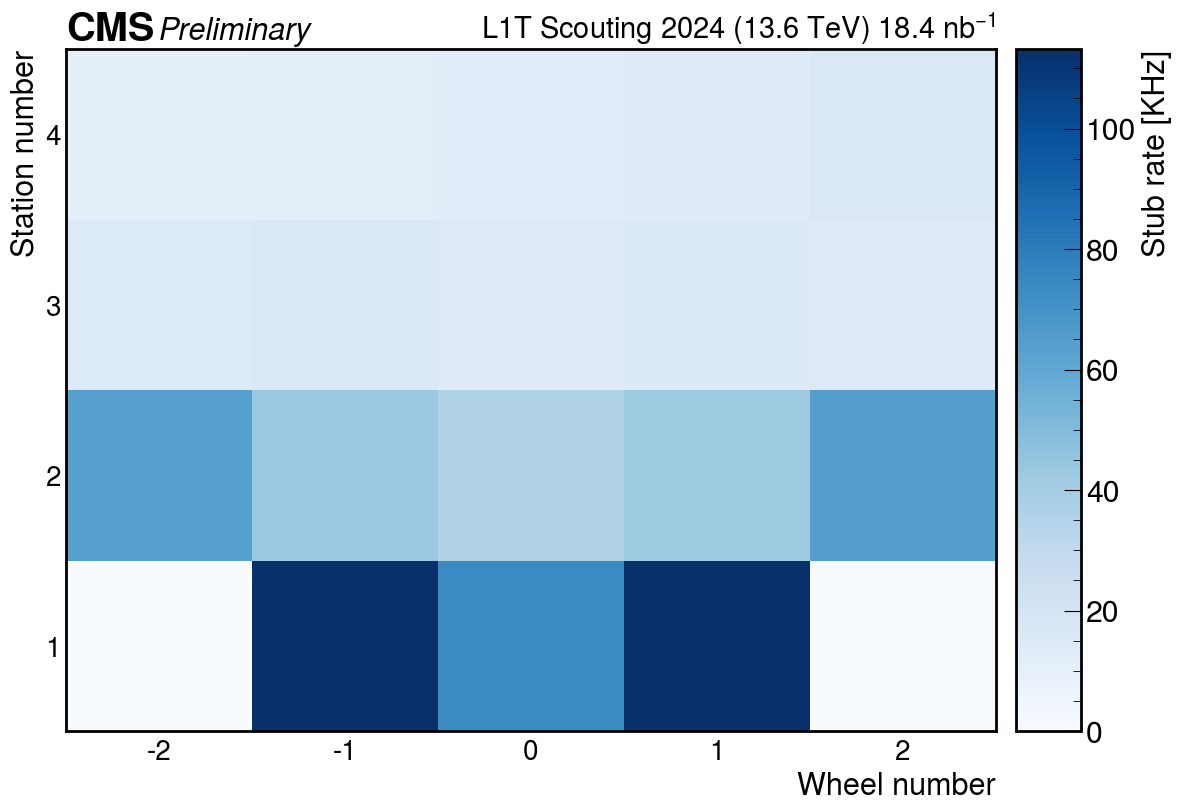

In [10]:
stub_station = ak.concatenate([StationLS133, StationLS263, StationLS264, StationLS306])
stub_wheels  = ak.concatenate([WheelLS133, WheelLS263, WheelLS264, WheelLS306])

Station_bins = np.arange(1, 6)
wheel_bins  = np.arange(-2, 4)

hist2d = hist.Hist(
    hist.axis.Variable(wheel_bins, name='wheel', label='Wheel number'),
    hist.axis.Variable(Station_bins, name='Station', label='Station number'),
)
hist2d.fill(wheel=stub_wheels, Station=stub_station)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize=FONTSIZE, rlabel="L1T Scouting 2024 (13.6 TeV) 18.4 $nb^{-1}$")

hep.hist2dplot(ConvertToKHz(hist2d), cbar=True, cmap='Blues', ax=ax)

cbar = ax.collections[0].colorbar
cbar.set_label('Stub rate [KHz]', fontsize=FONTSIZE)

ax.set_ylabel('Station number', fontsize = FONTSIZE)
ax.set_xlabel('Wheel number', fontsize = FONTSIZE)

ax.set_yticks(np.arange(1, 5)+0.5)
ax.set_yticklabels(np.arange(1, 5))

ax.set_xticks(np.arange(-2, 3)+0.5)
ax.set_xticklabels(np.arange(-2, 3))

plt.savefig("../Immagini/StubsStationWheel.pdf")

plt.show()

# Stubs per BX e per Orbit

RICONTROLLA PERCHE' NON PARTE DA ZERO!!

In [11]:
#Bincount di nStubs
nStubsLS133_count = ConvertToHz(np.bincount(nStubsLS133))
nStubsLS263_count = ConvertToHz(np.bincount(nStubsLS263))
nStubsLS264_count = ConvertToHz(np.bincount(nStubsLS264))
nStubsLS306_count = ConvertToHz(np.bincount(nStubsLS306))

nStubs_Array = ak.Array([nStubsLS133_count, nStubsLS263_count, nStubsLS264_count, nStubsLS306_count])

In [12]:
#Somma vettoriale di tutti i counts
MaxStubs = max(len(nStubs_Array[0]), len(nStubs_Array[1]), len(nStubs_Array[2]), len(nStubs_Array[3]))

#Filled Array per eseguire una somma vettoriale dei 4 array
FnStubsLS133 = ak.fill_none(ak.pad_none(nStubs_Array[0], MaxStubs, axis = 0, clip=True), 0)
FnStubsLS263 = ak.fill_none(ak.pad_none(nStubs_Array[1], MaxStubs, axis = 0, clip=True), 0)
FnStubsLS264 = ak.fill_none(ak.pad_none(nStubs_Array[2], MaxStubs, axis = 0, clip=True), 0)
FnStubsLS306 = ak.fill_none(ak.pad_none(nStubs_Array[3], MaxStubs, axis = 0, clip=True), 0)

nStubs = FnStubsLS133 + FnStubsLS263 + FnStubsLS264 + FnStubsLS306

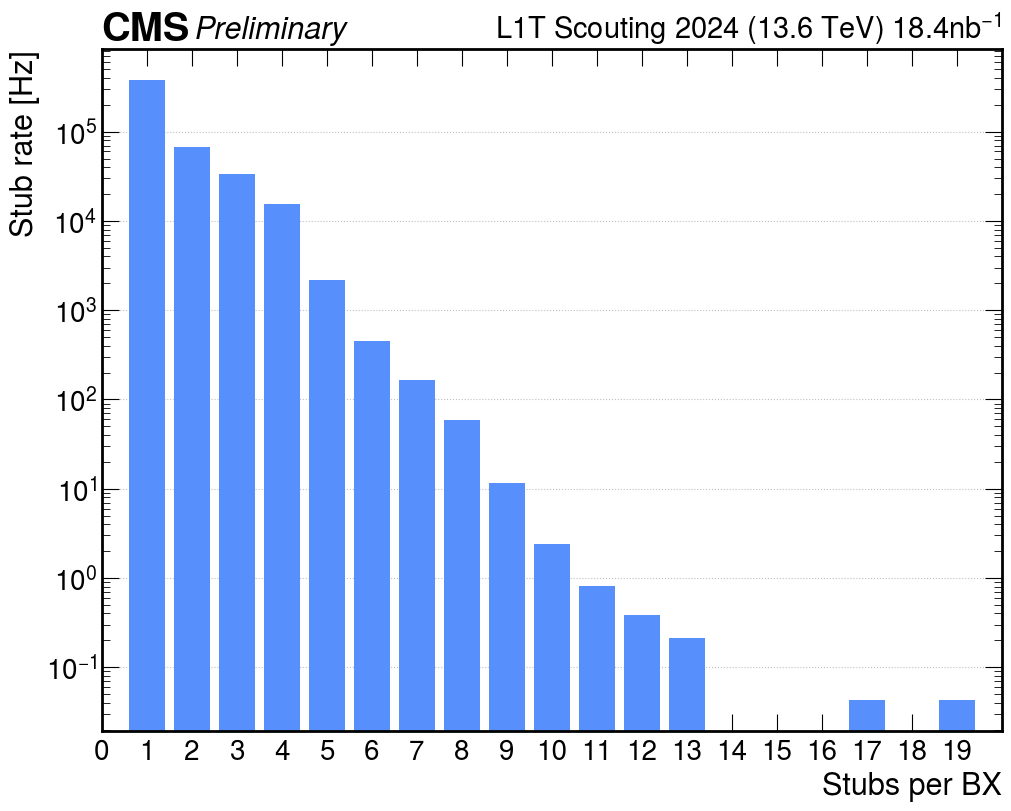

In [13]:
fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE)

ax.bar(np.arange(len(nStubs)), nStubs)

ax.set_xticks(ticks=np.arange(20), labels=np.arange(0, 20, 1))
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xlabel('Stubs per BX')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(0, 20)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')
ax.set_axisbelow(True)

plt.savefig("../Immagini/StubsMolteplicity.pdf")

In [14]:
#Stubs per orbit, (tempo di compilazione 4 minuti)

'''StubsPerOrbitLS133 = StubsPerOrbit(BX_LS133, nStubsLS133)
StubsPerOrbitLS263 = StubsPerOrbit(BX_LS263, nStubsLS263)
StubsPerOrbitLS264 = StubsPerOrbit(BX_LS264, nStubsLS264)
StubsPerOrbitLS306 = StubsPerOrbit(BX_LS306, nStubsLS306)'''
#D'ora in avanti il risultato di questa funzione è immagazzinato e pronto all'uso in "UtilityAndConst.py"

'StubsPerOrbitLS133 = StubsPerOrbit(BX_LS133, nStubsLS133)\nStubsPerOrbitLS263 = StubsPerOrbit(BX_LS263, nStubsLS263)\nStubsPerOrbitLS264 = StubsPerOrbit(BX_LS264, nStubsLS264)\nStubsPerOrbitLS306 = StubsPerOrbit(BX_LS306, nStubsLS306)'

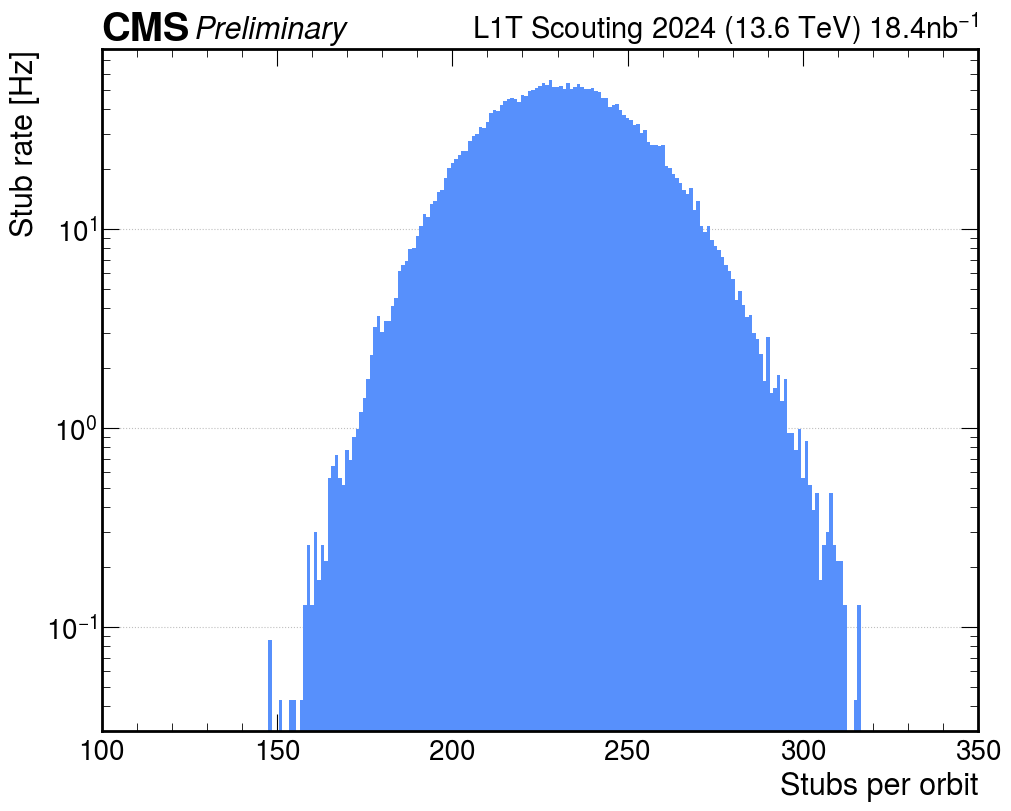

In [15]:
StubsPerOrbit = ConvertToHz(StubsPerOrbitLS133 + StubsPerOrbitLS263 + StubsPerOrbitLS264 + StubsPerOrbitLS306)

fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE)

bins = np.arange(1, len(StubsPerOrbit) + 1)

StubsPerOrbit_Hist = hist.Hist(hist.axis.Variable(bins, name="Stubs", ))

StubsPerOrbit_Hist.fill(Stubs=StubsPerOrbit)
#hep.histplot(StubsPerOrbit_Hist, label = "Stubs per Orbit", ax=ax, yerr = False, lw = 2)


ax.bar(np.arange(1, len(StubsPerOrbit) + 1), StubsPerOrbit, width=1)


#ax.set_xticks(ticks=np.arange(20), labels=np.arange(0, 20, 1))
ax.tick_params(axis='x', which='minor')
ax.set_xlabel('Stubs per orbit')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(100, 350)

ax.grid(visible=True, axis='y')
ax.set_yscale('log')
ax.set_axisbelow(True)


plt.savefig("../Immagini/StubsPerOrbit.pdf")